# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams.update({'font.size': 22})

We want to investigate a crystal configuration undergoing the **1D ising model**.

The Ising model is a simplified mathematical model used to describe the magnetic properties and configuration of particles, often applied to study phenomena like phase transitions and commonly used in statistical mechanics.

We consider a crystal configuration of **N=50 particles** in the Ising model:

Each particle is represented as a discrete unit or "spin": up (1) or down (0).
The particles interact with their nearest neighbors, and the energy of the system depends on the alignment of neighboring spins.

A **Hamiltonian** function is used to describe the energy of the system based on these spin alignments.
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
where J is a constant which describe the spin interaction and $s_i$ is the spin value (0 or 1) for the i-particle.

In the context of the Ising model, **evolving the system** means making decisions about how to modify the spins of particles at each iteration. Specifically, it involves choosing whether to flip a spin, i.e., change its direction from "up" to "down" or vice versa, taking into account the influence of interactions with neighboring spins and the energy associated with such changes. This iterative decision-making process of spin reversal is what allows the system to evolve over time, following the rules of the Ising model, until it reaches equilibrium or a stable configuration

We choose to simulate a sample of 50 particles repeated infinitely using **Periodic Boundary Conditions** (PBC).

### Exercise 06.1

We are going to investigate the 1D Ising model using Metropolis and Gibbs sampling algorithm. 
- the **Metropolis sampling algorithm** 

The strength of the Metropolis algorithm lies in the fact that at each step, it flips a spin with a probability determined by the Boltzmann's weight, $p(\{ s_i \}) = \exp(-\beta H)/Z$,. The ratio of probabilities from two Boltzmann distributions cancels out the term of partition function, which would otherwise be challenging to calculate. $$\frac{p(\{ s_i \})}{p(\{ s_j \})} = \exp(-\beta \Delta E)$$ Therefore, you only need to compute the energy difference of the system when we apply a single spin flip:

$$
    \Delta E = 2s_j(-J(s_{j-1}+s_{j+1})+h)
$$
- the **Gibbs sampling algorithm**
Each step we select a random particle to invert the spin with the probability:
$$
    P = \frac{1}{1+\exp(-\beta \Delta E)}
$$

Moreover we also included the possibility to restart from a previous spin configuration.

We compute the following quantities:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

#### EQUILIBRATION
Before to proceed with the simulations we need to equilibratie the system.

In [2]:

#variable
teo_p = []
T = np.linspace(0.5,2.0,100)
beta = 1/T
b = beta
J = 1.0
Ns = 50

#Energy
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
teo_p.append(e)

#Heat
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
teo_p.append(heat)

#Magnetization
h =0.02
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
teo_p.append(M)

#susciettibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
teo_p.append(X)

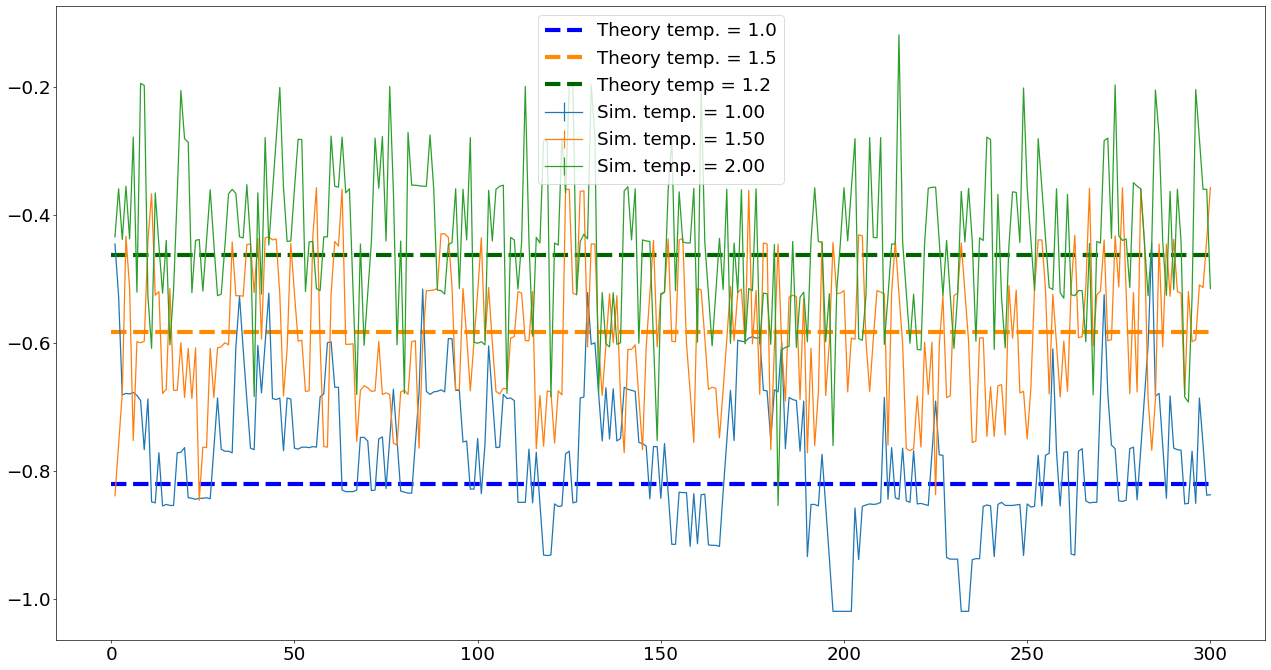

In [20]:
plt.figure(figsize=(26, 14), dpi=60)
for t in ("1.00", "1.50", "2.00"):
    #plt.title(f'{labels[count]}')
    x_eq,s_eq,err_eq = np.loadtxt(f"./data/outputEq_ene_1_{t}.dat", usecols=(0,1,2), unpack='true')       
    plt.errorbar(x_eq,s_eq,yerr = err_eq,label=f"Sim. temp. = {t}")
plt.hlines(e[24],0,300,linestyle='--',linewidth= 5,color ="blue",label="Theory temp. = 1.0")
plt.hlines(e[66],0,300,linestyle='--',linewidth= 5,color ="darkorange",label="Theory temp. = 1.5")
plt.hlines(e[-1],0,300,linestyle='--',linewidth= 5,color ="darkgreen",label="Theory temp = 1.2")
plt.legend()

The measured energy reaches the equilibrium value in less than 300 steps. Equilibrating the system is completely irrelevant in the final result of the simulations.

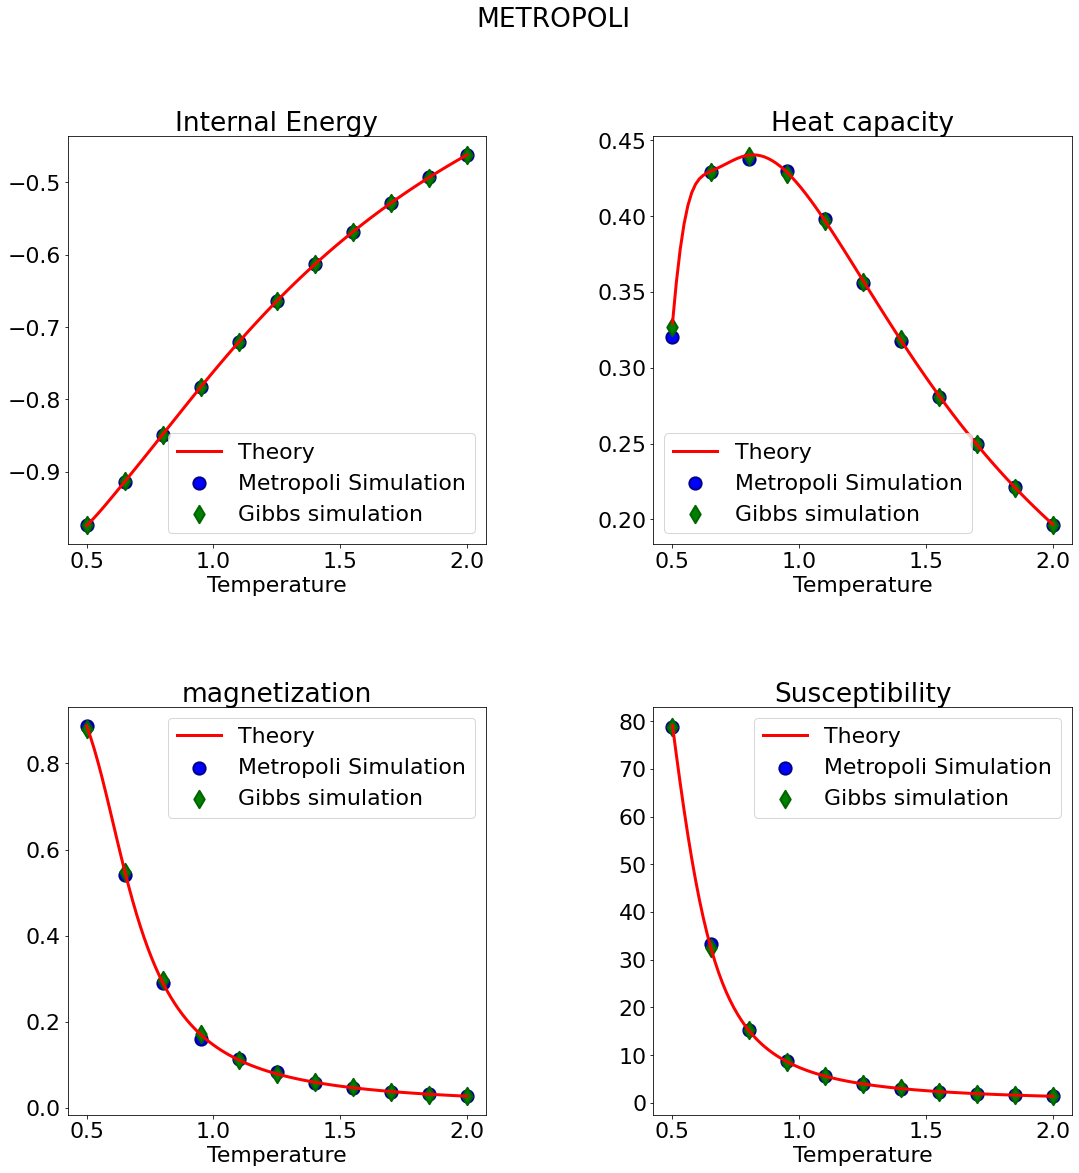

In [21]:

file_name =["ene","heat","mag","chi"]
labels = ["Internal Energy","Heat capacity","magnetization","Susceptibility"]
h_list = [0,0,0.02,0]
fig, axs = plt.subplots(2, 2,figsize=(18,18))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#METROPOLI GRAPHS
x = []; s = []; err = []
for i in range(4):
    xt,st,errt = np.loadtxt(f"./data/output_{file_name[i]}_{h_list[i]}_0.dat", usecols=(0,1,2), unpack='true')
    s.append(st)
    err.append(errt)
    x.append(xt)
    
count = 0
for ax in axs:
    for a in ax:
        a.plot(T, teo_p[count],c='r',linewidth = 3,label="Theory")
        a.scatter(x[count],s[count],label="Metropoli Simulation",marker = 'o',s=150,c = "blue",linewidths=2, edgecolors="darkblue")#,yerr=err[count]
        a.set_title(f'{labels[count]}')
        a.set_xlabel('Temperature')
        count = count+1
        
#GIBBS GRAPHS
x = []; s = []; err = []
for i in range(4):
    xt,st,errt = np.loadtxt(f"../dati/es6/output_{file_name[i]}_{h_list[i]}_1.dat", usecols=(0,1,2), unpack='true')
    s.append(st)
    err.append(errt)
    x.append(xt)
    
count = 0
for ax in axs:
    for a in ax:
        a.scatter(x[count],s[count],label="Gibbs simulation",marker = 'd',s=150,c = "green",linewidths=2, edgecolors="darkgreen")#,yerr=err[count]
        a.set_title(f'{labels[count]}')
        a.set_xlabel('Temperature')
        a.legend()
        count = count+1
#ax_t.hlines(0.8,0,50,color ="red",label="theory")
fig.suptitle('METROPOLI')

plt.show()

The Internal Energy, Heat capacity, Magnetization and Susceptibility obtained with Metropoli and Gibbs algorithms with respect to the temperature shows a qualitative agreement with the theory.

In [22]:
#variable
start = 3
teo_p = []
T = np.linspace(0.5,2.0,11)
T= T[start:]
beta = 1/T

#Energy
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
teo_p.append(e)

#Heat
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
teo_p.append(heat)

#Magnetization
h =0.02
b = beta
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
teo_p.append(M)

#susciettibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
teo_p.append(X)

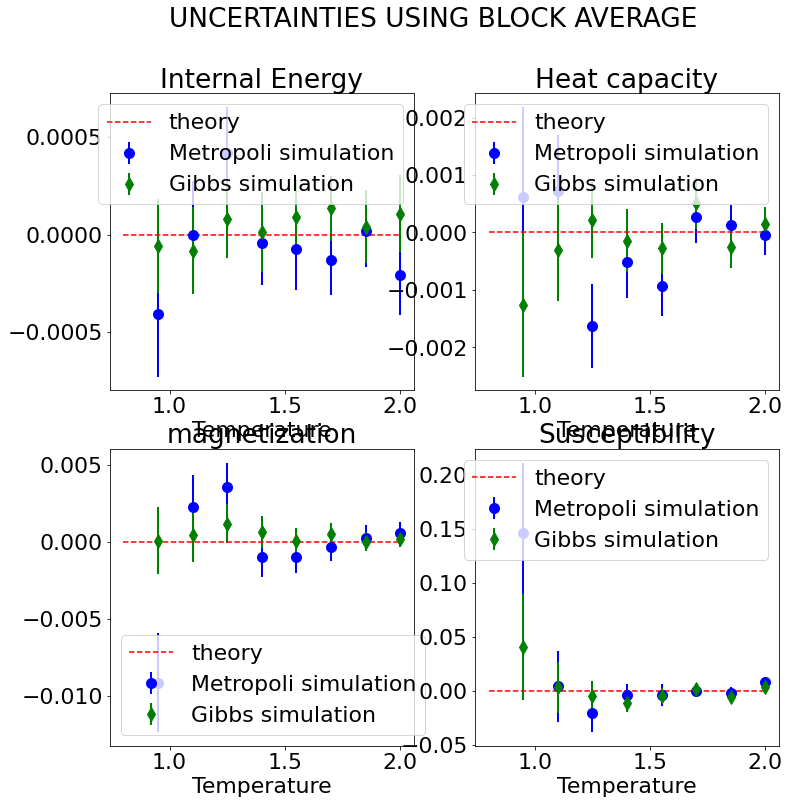

In [23]:
fig, axs = plt.subplots(2, 2,figsize=(12,12))

#METROPOLI GRAPHS
x = []; s = []; err = []
for i in range(4):
    xt,st,errt = np.loadtxt(f"./data/output_{file_name[i]}_{h_list[i]}_0.dat", usecols=(0,1,2), unpack='true')
    s.append(st[start:])
    err.append(errt[start:])
    x.append(xt[start:])
    
count = 0
for ax in axs:
    for a in ax:
        #a.plot(T, teo_p[count],c='r',linewidth = 3,label="Theory")
        a.errorbar(x[count],s[count]-teo_p[count],label="Metropoli simulation",yerr=err[count],color='blue',linestyle="",linewidth=2, marker="o" ,markersize=10)
        a.set_title(f'{labels[count]}')
        a.set_xlabel('Temperature')
        count = count+1
        
#GIBBS GRAPHS
x = []; s = []; err = []
for i in range(4):
    xt,st,errt = np.loadtxt(f"./data/output_{file_name[i]}_{h_list[i]}_1.dat", usecols=(0,1,2), unpack='true')
    s.append(st[start:])
    err.append(errt[start:])
    x.append(xt[start:])
    
count = 0
for ax in axs:
    for a in ax:
        a.errorbar(x[count],s[count]-teo_p[count],label="Gibbs simulation",yerr=err[count],color='green',linestyle="",linewidth=2, marker="d" ,markersize=10)
        a.set_title(f'{labels[count]}')
        a.set_xlabel('Temperature')
        a.hlines(0,0.8,2,linestyle='--',color ="red",label="theory")
        a.legend()
        count = count+1

fig.suptitle('UNCERTAINTIES USING BLOCK AVERAGE')

plt.show()

All the presented results are consistent with the theoretical predictions within a few sigma.